In [46]:
# PART ONE

# -------------------------------------------------------------------------------------------------------------------------------------------
# BELOW IS A COPY OF FILE T-bot_final-2.ipynb WHICH CONTAINS ALL DATA AND PLOTS
# -------------------------------------------------------------------------------------------------------------------------------------------
# Import libraries and dependencies
#import panel as pn
#pn.extension('plotly')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation
#%matplotlib inline

In [47]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Create Alpaca API Environment
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


# Set Timeframe, Start Date and End Date
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-11-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-02", tz="America/New_York").isoformat()



# Define Function that Returns a Data Frame from Alpaca for the List of Securities
# Get 10 year's worth of historical price data
def alpaca_df(tickers):
    df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
    ).df
    
    return df_ticker

In [48]:
# International Portfolios (iShare Asset Allocation ETFs with Global Scope and Automatic Rebalancing)

#70% in Stocks and 30% in Bonds
#International Core Conservative Allocation:
#Tickers
intl_cc = ["AOK"]
#Weights
intl_cc_w = [1.0]

#60% in Bonds and 40% in Stocks
#International Core Moderate Allocation:
#Tickers
intl_cm = ["AOM"]
#Weights
intl_cm_w = [1.0]

#60% in Stocks and 40% in Bonds
#International Core Growth Allocation:
#Tickers
intl_cg = ["AOR"]
#Weights
intl_cg_w = [1.0]

#80% in Stocks and 20% in Bonds
#International Core Aggressive Allocation:
#Tickers
intl_ca = ["AOA"]
#Weights
intl_ca_w = [1.0]

#100% in stocks
# Core S&P Total U.S. Stock Market 
# Tickers
intl_cs = ["ITOT"]
#Weights
intl_cs_w = [1.0]

In [49]:
# Create Data Frames for All Portfolios

# 'INTERNATIONAL'
# intl_core_conservative_all = ["AOK"]
tickers = intl_cc
intl_cc_df=alpaca_df(tickers)
# intl_cc_df.head()

# intl_core_moderate_all = ["AOM"]
tickers = intl_cm
intl_cm_df=alpaca_df(tickers)
# intl_cm_df.head()

# intl_core_growth_all = ["AOR"]
tickers = intl_cg
intl_cg_df=alpaca_df(tickers)
# intl_cg_df.head()

# intl_core_aggressive_all = ["AOA"]
tickers = intl_ca
intl_ca_df=alpaca_df(tickers)
# intl_ca_df.head()

# intl_core_equity_all = ["ITOT"]
tickers = intl_cs
intl_cs_df=alpaca_df(tickers)
# intl_cs_df.head()

In [50]:
#===================================================================================================

# MONTE CARLO CSV INPUT
# Read csv data files
#@st.cache
intl_cc_simulated_MEAN_returns_df = pd.read_csv(Path("../input/CC.csv"),skiprows=0).dropna()
intl_cm_simulated_MEAN_returns_df = pd.read_csv(Path("../input/CM.csv"),skiprows=0).dropna()
intl_cg_simulated_MEAN_returns_df = pd.read_csv(Path("../input/CG.csv"),skiprows=0).dropna()
intl_ca_simulated_MEAN_returns_df = pd.read_csv(Path("../input/CA.csv"),skiprows=0).dropna()
intl_cs_simulated_MEAN_returns_df = pd.read_csv(Path("../input/CS.csv"),skiprows=0).dropna()
# intl_ca_simulated_MEAN_returns_df
#===================================================================================================
# LIVE MONTE CARLO CURRENTLY DISABLED. USE SCV FILES INSTEAD.
#===================================================================================================

In [51]:
# Set Parmeters for Monte Carlo Simulations

#Number of Simulations
#ns=10

#Number of Trading Days
#ntd=252*1

# Set initial investment
initial_investment = 10000



# Run the Monte Carlo Simulation

#1
# 'INTERNATIONAL'
# intl_core_conservative_all = ["AOK"]
# intl_cc_df
# intl_cc_w

intl_cc_title="International Core Conservative Allocation"


# MC_INTL_CC = MCSimulation(
#     portfolio_data = intl_cc_df,
#     weights = intl_cc_w,
#     num_simulation = ns,
#     num_trading_days = ntd
# )


# # Run a Monte Carlo simulation to forecast cumulative returns
# MC_INTL_CC.calc_cumulative_return()

# # Fetch summary statistics from the Monte Carlo simulation results
# intl_cc_tbl = MC_INTL_CC.summarize_cumulative_return()

# # Compute mean from the simulated daily returns
# intl_cc_MEAN_returns_data = {"mean": list(MC_INTL_CC.simulated_return.mean(axis=1)),}

# # Create a DataFrame with the mean statistics
# intl_cc_simulated_MEAN_returns_df = pd.DataFrame(intl_cc_MEAN_returns_data)
# intl_cc_simulated_MEAN_returns_df=intl_cc_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Conservative"})


# Use the `plot` function to visually analyze the trajectory 
#intl_cc_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cc_title} Portfolio")"""

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
# @st.cache
intl_cc_cumulative_pnl = initial_investment * intl_cc_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
#intl_cc_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cc_title} Portfolio Over the Next 1 Year")

In [52]:
#2
# 'INTERNATIONAL'
# intl_core_moderate_all = ["AOM"]
# intl_cc_df
# intl_cc_w

intl_cm_title="International Core Moderate Allocation"

# MC_INTL_CM = MCSimulation(
#     portfolio_data = intl_cm_df,
#     weights = intl_cm_w,
#     num_simulation = ns,
#     num_trading_days = ntd
# )

# # Run a Monte Carlo simulation to forecast cumulative returns
# MC_INTL_CM.calc_cumulative_return()

# # Fetch summary statistics from the Monte Carlo simulation results
# intl_cm_tbl = MC_INTL_CM.summarize_cumulative_return()

# # Compute mean from the simulated daily returns
# intl_cm_MEAN_returns_data = {"mean": list(MC_INTL_CM.simulated_return.mean(axis=1)),}

# # Create a DataFrame with the mean statistics
# intl_cm_simulated_MEAN_returns_df = pd.DataFrame(intl_cm_MEAN_returns_data)
# intl_cm_simulated_MEAN_returns_df=intl_cm_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Moderate"})


# Use the `plot` function to visually analyze the trajectory 
#intl_cm_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cm_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
#@st.cache
intl_cm_cumulative_pnl = initial_investment * intl_cm_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
#intl_cm_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cm_title} Portfolio Over the Next 1 Year")

In [53]:
#3
# 'INTERNATIONAL'
# intl_core_growth_all = ["AOR"]
# intl_cg_df
# intl_cg_w

intl_cg_title="International Core Growth Allocation"

# MC_INTL_CG = MCSimulation(
#     portfolio_data = intl_cg_df,
#     weights = intl_cg_w,
#     num_simulation = ns,
#     num_trading_days = ntd
# )

# # Run a Monte Carlo simulation to forecast cumulative returns
# MC_INTL_CG.calc_cumulative_return()

# # Fetch summary statistics from the Monte Carlo simulation results
# intl_cg_tbl = MC_INTL_CG.summarize_cumulative_return()

# # Compute mean from the simulated daily returns
# intl_cg_MEAN_returns_data = {"mean": list(MC_INTL_CG.simulated_return.mean(axis=1)),}

# # Create a DataFrame with the mean statistics
# intl_cg_simulated_MEAN_returns_df = pd.DataFrame(intl_cg_MEAN_returns_data)
# intl_cg_simulated_MEAN_returns_df=intl_cg_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Growth"})

# Use the `plot` function to visually analyze the trajectory 
#intl_cg_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cg_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
#@st.cache
intl_cg_cumulative_pnl = initial_investment * intl_cg_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
#intl_cg_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cg_title} Portfolio Over the Next 1 Year")

In [54]:
#4
# 'INTERNATIONAL'
# intl_core_aggressive_all = ["AOK"]
# intl_ca_df
# intl_ca_w

intl_ca_title="International Core Aggressive Allocation"

# MC_INTL_CA = MCSimulation(
#     portfolio_data = intl_ca_df,
#     weights = intl_ca_w,
#     num_simulation = ns,
#     num_trading_days = ntd
# )

# # Run a Monte Carlo simulation to forecast cumulative returns
# MC_INTL_CA.calc_cumulative_return()

# # Fetch summary statistics from the Monte Carlo simulation results
# intl_ca_tbl = MC_INTL_CA.summarize_cumulative_return()

# # Compute mean from the simulated daily returns
# intl_ca_MEAN_returns_data = {"mean": list(MC_INTL_CA.simulated_return.mean(axis=1)),}

# # Create a DataFrame with the mean statistics
# intl_ca_simulated_MEAN_returns_df = pd.DataFrame(intl_ca_MEAN_returns_data)
# intl_ca_simulated_MEAN_returns_df=intl_ca_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Aggressive"})

# # Use the `plot` function to visually analyze the trajectory 
# #intl_ca_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_ca_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
#@st.cache
intl_ca_cumulative_pnl = initial_investment * intl_ca_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
#intl_ca_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_ca_title} Portfolio Over the Next 1 Year")

In [55]:
#5
# 'INTERNATIONAL'
# intl_core_equity_all = ["ITOT"]
# intl_cs_df
# intl_cs_w

intl_cs_title="Core S&P Total US Stock Market"

# MC_INTL_CS = MCSimulation(
#     portfolio_data = intl_cs_df,
#     weights = intl_cs_w,
#     num_simulation = ns,
#     num_trading_days = ntd
# )

# # Run a Monte Carlo simulation to forecast cumulative returns
# MC_INTL_CS.calc_cumulative_return()

# # Fetch summary statistics from the Monte Carlo simulation results
# intl_cs_tbl = MC_INTL_CS.summarize_cumulative_return()

# # Compute mean from the simulated daily returns
# intl_cs_MEAN_returns_data = {"mean": list(MC_INTL_CS.simulated_return.mean(axis=1)),}

# # Create a DataFrame with the mean statistics
# intl_cs_simulated_MEAN_returns_df = pd.DataFrame(intl_cs_MEAN_returns_data)
# intl_cs_simulated_MEAN_returns_df=intl_cs_simulated_MEAN_returns_df.rename(columns={"mean":"Intl Core Equity All"})

# # Use the `plot` function to visually analyze the trajectory 
# #intl_cs_simulated_MEAN_returns_df.plot(title=f"Simulated Daily Returns Behavior of {intl_cs_title} Portfolio")

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
#@st.cache
intl_cs_cumulative_pnl = initial_investment * intl_cs_simulated_MEAN_returns_df

# Use the 'plot' function to create a chart of the simulated profits/losses
#intl_cs_cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {intl_cs_title} Portfolio Over the Next 1 Year")

In [56]:
# Create a Data Frame that contains the MEAN simulated returns
mean_forecasts_df = pd.concat([intl_cc_simulated_MEAN_returns_df,
                          intl_cm_simulated_MEAN_returns_df,
                          intl_cg_simulated_MEAN_returns_df,
                          intl_ca_simulated_MEAN_returns_df, 
                          intl_cs_simulated_MEAN_returns_df], axis=1, join="inner")
# new_pd = pd.concat(mean_df_list)
#mean_forecasts_df.plot(figsize=(15,10), logy=True)



# Create a Data Frame that contains the simiulated MEAN cumulative PnL
mean_pnl_forecasts_df = pd.concat([intl_cc_cumulative_pnl,
                          intl_cm_cumulative_pnl,
                          intl_cg_cumulative_pnl,
                          intl_ca_cumulative_pnl, 
                          intl_cs_cumulative_pnl], axis=1, join="inner")
# new_pd = pd.concat(mean_df_list)
#mean_pnl_forecasts_df.plot(figsize=(15,10), logy=False)

In [57]:
# Portfolio Geographical Mix
# Read csv data files
#@st.cache
aok_facts = pd.read_csv(Path("../input/AOK_holdings.csv"),skiprows=29).dropna()
aom_facts = pd.read_csv(Path("../input/AOM_holdings.csv"),skiprows=29).dropna()
aor_facts = pd.read_csv(Path("../input/AOR_holdings.csv"),skiprows=29).dropna()
aoa_facts = pd.read_csv(Path("../input/AOa_holdings.csv"),skiprows=31).dropna()
itot_facts = pd.read_csv(Path("../input/ITOT_holdings.csv"),skiprows=9).dropna()

# ----------------------------------------------------------------------------------

# 1. AOK - iShares Core Conservative ETF Allocation
# Get Portfolio Geographical Mix
#aok_facts.head()
#Calculate Geo Mix
aok_geo_mix=aok_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
aok_geo_mix["Market Value"]=aok_geo_mix["Market Value"].str.replace(",","").astype('float')
aok_gm=aok_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
aok_gm_weights=aok_facts[["Location","Weight (%)"]].set_index("Location").groupby("Location").sum().sort_values("Weight (%)", ascending=False).head(10)
#aok_gm.head(10)

#Plot Geo Mix
#aok_gm.plot.pie(y="Market Value",figsize=(10,10))

#Add a column with countries' ISO indeces
aok_gm_plotly=aok_gm.reset_index()

aok_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","ITA"]
#aok_gm_plotly.head(10)

# aok_gm_plotly=aok_gm.reset_index()
# fig_aok_gm=px.pie(aok_gm_plotly, values="Market Value", names="Location", width=650,
#     height=500, title="Core Conservative Allocation Portfolio Holdings by Country")
# fig_aok_gm.show()

# ---------------------------------------------
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
# ---------------------------------------------
# px.set_mapbox_access_token(map_box_api)
# ---------------------------------------------

# Create a scatter mapbox to analyze neighbourhood info
# import plotly.express as px
# Set the Mapbox API
# px.set_mapbox_access_token(map_box_api)

#aok_gm_plotly.head()


# Create Mapbox plot
map_aok=px.choropleth(aok_gm_plotly, locations="Country", color="Weight (%)", title="Core Conservative Allocation Portfolio Holdings by Country")
# map_aok.show()


# Get Portfolio Asset Mix
aok_asset_classes=aok_facts[["Asset Class","Market Value"]].set_index("Asset Class")
aok_asset_classes["Market Value"]=aok_asset_classes["Market Value"].str.replace(",","").astype('float')
aok_ac=aok_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
#aok_ac.head(20)


#aok_ac.plot.pie(y="Market Value",figsize=(10,10))


aok_ac_plotly=aok_ac.reset_index()
#aok_ac_plotly
# fig_aok_ac=px.pie(aok_ac_plotly, values="Market Value", names="Asset Class", width=650,
#     height=500, title="Core Conservative Allocation Portfolio Holdings by Asset Class")
# fig_aok_ac.show()



In [58]:
# ----------------------------------------------------------------------------------
# 2. AOM - iShares Core Moderate ETF Allocation
# Get Portfolio Geographical Mix
#aom_facts.head()
#Calculate Geo Mix
#@st.cache
aom_geo_mix=aom_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
aom_geo_mix["Market Value"]=aom_geo_mix["Market Value"].str.replace(",","").astype('float')
aom_gm=aom_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
aom_gm_weights=aom_facts[["Location","Weight (%)"]].set_index("Location").groupby("Location").sum().sort_values("Weight (%)", ascending=False).head(10)
#aom_gm.head(10)

#Plot Geo Mix
#aom_gm.plot.pie(y="Market Value",figsize=(10,10))

#Add a column with countries' ISO indeces
aom_gm_plotly=aom_gm.reset_index()

aom_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","ITA"]
#aom_gm_plotly.head(10)

In [59]:
# aom_gm_plotly=aom_gm.reset_index()
# fig_aom_gm=px.pie(aom_gm_plotly, values="Market Value", names="Location", width=650,
#     height=500, title="Core Moderate Allocation Portfolio Holdings by Country")
# fig_aom_gm.show()

map_aom=px.choropleth(aom_gm_plotly, locations="Country", color="Weight (%)", title="Core Moderate Allocation Portfolio Holdings by Country")
# map_aom.show()

# Get Portfolio Asset Mix
#@st.cache
aom_asset_classes=aom_facts[["Asset Class","Market Value"]].set_index("Asset Class")
aom_asset_classes["Market Value"]=aom_asset_classes["Market Value"].str.replace(",","").astype('float')
aom_ac=aom_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
#aom_ac.head(20)

#aom_ac.plot.pie(y="Market Value",figsize=(10,10))

aom_ac_plotly=aom_ac.reset_index()
#aom_ac_plotly
# fig_aom_ac=px.pie(aom_ac_plotly, values="Market Value", names="Asset Class", width=650,
#     height=500, title="Core Moderate Allocation Portfolio Holdings by Asset Class")
# fig_aom_ac.show()

In [60]:
# ----------------------------------------------------------------------------------

# 3. AOR - iShares Core Growth ETF Allocation
# Get Portfolio Geographical Mix
#aor_facts.head()

#Calculate Geo Mix
#@st.cache
aor_geo_mix=aor_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
aor_geo_mix["Market Value"]=aor_geo_mix["Market Value"].str.replace(",","").astype('float')
aor_gm=aor_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
aor_gm_weights=aor_facts[["Location","Weight (%)"]].set_index("Location").groupby("Location").sum().sort_values("Weight (%)", ascending=False).head(10)
#aor_gm.head(10)

#Plot Geo Mix
#aor_gm.plot.pie(y="Market Value",figsize=(10,10))

#Add a columnt iwth countries' ISO codes
aor_gm_plotly=aor_gm.reset_index()

aor_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","KOR"]
#aor_gm_plotly.head(10)

# aor_gm_plotly=aor_gm.reset_index()
# fig_aor_gm=px.pie(aor_gm_plotly, values="Market Value", names="Location", width=650,
#     height=500, title="Core Growth Allocation Portfolio Holdings by Country")
# fig_aor_gm.show()


map_aor=px.choropleth(aor_gm_plotly, locations="Country", color="Weight (%)", title="Core Growth Allocation Portfolio Holdings by Country")
# map_aor.show()

# Get Portfolio Asset Mix
#@st.cache
aor_asset_classes=aor_facts[["Asset Class","Market Value"]].set_index("Asset Class")
aor_asset_classes["Market Value"]=aor_asset_classes["Market Value"].str.replace(",","").astype('float')
aor_ac=aor_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
#aor_ac.head(20)

#aor_ac.plot.pie(y="Market Value",figsize=(10,10))

aor_ac_plotly=aor_ac.reset_index()
#aor_ac_plotly
# fig_aor_ac=px.pie(aor_ac_plotly, values="Market Value", names="Asset Class", width=650,
#     height=500, title="Core Growth Allocation Portfolio Holdings by Asset Class")
# fig_aor_ac.show()

In [61]:
# ----------------------------------------------------------------------------------
# 4. AOA - iShares Core Aggressive ETF Allocation
# Get Portfolio Geographical Mix
# aoa_facts.head()

#Calculate Geo Mix
# @st.cache
aoa_geo_mix=aoa_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
aoa_geo_mix["Market Value"]=aoa_geo_mix["Market Value"].str.replace(",","").astype('float')
aoa_gm=aor_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(10)
aoa_gm_weights=aoa_facts[["Location","Weight (%)"]].set_index("Location").groupby("Location").sum().sort_values("Weight (%)", ascending=False).head(10)
#aoa_gm.head(10)

#Plot Geo Mix
#aoa_gm.plot.pie(y="Market Value",figsize=(10,10))

#Add a columnt iwth countries' ISO codes
aoa_gm_plotly=aoa_gm.reset_index()

aoa_gm_plotly["Country"]=["USA","JPN","CHN","GBR","FRA","CAN","DEU","CHE","AUS","KOR"]
#aoa_gm_plotly.head(10)

# aoa_gm_plotly=aoa_gm.reset_index()
# fig_aoa_gm=px.pie(aoa_gm_plotly, values="Market Value", names="Location", width=650,
#     height=500, title="Core Aggressive Allocation Portfolio Holdings by Country")
# fig_aoa_gm.show()

map_aoa=px.choropleth(aoa_gm_plotly, locations="Country", color="Weight (%)", title="Core Aggressive Allocation Portfolio Holdings by Country")
# map_aoa.show()

# Get Portfolio Asset Mix
# @st.cache
aoa_asset_classes=aoa_facts[["Asset Class","Market Value"]].set_index("Asset Class")
aoa_asset_classes["Market Value"]=aoa_asset_classes["Market Value"].str.replace(",","").astype('float')
aoa_ac=aoa_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(4)
#aoa_ac.head(20)

#aoa_ac.plot.pie(y="Market Value",figsize=(10,10))

aoa_ac_plotly=aoa_ac.reset_index()
#aoa_ac_plotly
# fig_aoa_ac=px.pie(aoa_ac_plotly, values="Market Value", names="Asset Class", width=650,
#     height=500, title="Core Aggressive Allocation Portfolio Holdings by Asset Class")
# fig_aoa_ac.show()

In [62]:
# ----------------------------------------------------------------------------------
# 5. ITOT - iShares Core S&P Total U.S. Stock Market ETF Allocation
# Get Portfolio Geographical Mix
#itot_facts.head()

#Calculate Geo Mix
# @st.cache
itot_geo_mix=itot_facts[["Location","Market Value","Weight (%)"]].set_index("Location")
itot_geo_mix["Market Value"]=itot_geo_mix["Market Value"].str.replace(",","").astype('float')
itot_gm=itot_geo_mix.groupby("Location").sum().sort_values("Market Value", ascending=False).head(3)
itot_gm_weights=itot_facts[["Location","Weight (%)"]].set_index("Location").groupby("Location").sum().sort_values("Weight (%)", ascending=False).head(10)
#itot_gm.head(10)

#Plot Geo Mix
#itot_gm.plot.pie(y="Market Value",figsize=(10,10))

#Add a columnt iwth countries' ISO codes
itot_gm_plotly=itot_gm.reset_index()

itot_gm_plotly["Country"]=["USA","CAN","AUS"]
itot_gm_plotly.head(10)

# itot_gm_plotly=itot_gm.reset_index()
# fig_itot_gm=px.pie(itot_gm_plotly, values="Market Value", names="Location", width=650,
#     height=500, title="Core S&P Total U.S. Stock Market Portfolio Holdings by Country")
# fig_itot_gm.show()

map_itot=px.choropleth(itot_gm_plotly, locations="Country", color="Weight (%)", title="Core S&P Total U.S. Stock Market Portfolio Holdings by Country")
# map_itot.show()


# Get Portfolio Asset Mix
# @st.cache
itot_asset_classes=itot_facts[["Asset Class","Market Value"]].set_index("Asset Class")
itot_asset_classes["Market Value"]=itot_asset_classes["Market Value"].str.replace(",","").astype('float')
itot_ac=itot_asset_classes.groupby("Asset Class").sum().sort_values("Market Value", ascending=False).head(3)
#itot_ac.head(20)

#itot_ac.plot.pie(y="Market Value",figsize=(10,10))

itot_ac_plotly=itot_ac.reset_index()
# fig_itot_ac=px.pie(itot_ac_plotly, values="Market Value", names="Asset Class", width=650,
#     height=500, title="Core S&P Total U.S. Stock Market Portfolio Holdings by Asset Class")
# fig_itot_ac.show()
#itot_ac_plotly

In [63]:
# ----------------------------------------------------------------------------------

# Quantitative Analysis
# Data Cleaning
# 1. AOK - iShares Core Conservative ETF Allocation
# Read the CSV into a DataFrame using Pandas

# Reading AOK ETF and set the `date` as the index
# @st.cache
aok_path = Path("../input/aok.csv")
aok_returns = pd.read_csv(aok_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order

aok_returns.sort_index(ascending = True, inplace = True)

# Display sample data
aok_returns.head(10)



# Checking for nulls
# # Check for null values
aok_returns.isnull()

# Display sample data

aok_returns.head(10)


# Determine number of nulls

aok_returns.isnull().sum()



# Rename `Close` Column to be specific to this portfolio.

aok_returns.rename(columns={"Close":"AOK"}, inplace = True)

# Drop extra columns

aok_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

#aok_returns.head(10)

In [64]:
# 2. AOM - iShares Core Moderate ETF Allocation
# Read the CSV into a DataFrame using Pandas
# # Reading AOK ETF and set the `date` as the index
# @st.cache
aom_path = Path("../input/aom.csv")
aom_returns = pd.read_csv(aom_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order
aom_returns.sort_index(ascending = True, inplace = True)

# Display sample data
aom_returns.head(10)

# Check for null values
aom_returns.isnull()

# Display sample data

aom_returns.head(10)

# Determine number of nulls

aom_returns.isnull().sum()

# Rename `Close` Column to be specific to this portfolio.

aom_returns.rename(columns={"Close":"AOM"}, inplace = True)

# Drop extra columns

aom_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

#aom_returns.head(10)

In [65]:
# 3. AOR - iShares Core Growth ETF Allocation
# Read the CSV into a DataFrame using Pandas
# # Reading AOR ETF and set the `date` as the index
# @st.cache
aor_path = Path("../input/aor.csv")
aor_returns = pd.read_csv(aor_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order
aor_returns.sort_index(ascending = True, inplace = True)

# Display sample data
aor_returns.head(10)


# Check for null values
aor_returns.isnull()

# Display sample data

aor_returns.head(10)

# Determine number of nulls

aor_returns.isnull().sum()

# Rename `Close` Column to be specific to this portfolio.

aor_returns.rename(columns={"Close":"AOR"}, inplace = True)

# Drop extra columns

aor_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

#aor_returns.head(10)

In [66]:
# 4. AOA - iShares Core Aggressive ETF Allocation
# Read the CSV into a DataFrame using Pandas
# # Reading AOR ETF and set the `date` as the index
# @st.cache
aoa_path = Path("../input/aoa.csv")
aoa_returns = pd.read_csv(aoa_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order
aoa_returns.sort_index(ascending = True, inplace = True)

# Display sample data
aoa_returns.head(10)

# Check for null values
aoa_returns.isnull()

# Display sample data

aoa_returns.head(10)

# Determine number of nulls

aoa_returns.isnull().sum()

# Rename `Close` Column to be specific to this portfolio.

aoa_returns.rename(columns={"Close":"AOA"}, inplace = True)

# Drop extra columns

aoa_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

#aoa_returns.head(10)

In [67]:
# 5. ITOT - iShares Core S&P Total U.S. Stock Market ETF
# Read the CSV into a DataFrame using Pandas¶
# # Reading ITOT ETF and set the `date` as the index
# @st.cache
itot_path = Path("../input/itot.csv")
itot_returns = pd.read_csv(itot_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order
itot_returns.sort_index(ascending = True, inplace = True)

# Display sample data
itot_returns.head(10)


itot_returns.isnull()

# Display sample data

itot_returns.head(10)

# Determine number of nulls

itot_returns.isnull().sum()


itot_returns.rename(columns={"Close":"ITOT"}, inplace = True)

# Drop extra columns

itot_returns.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace = True)

# Display sample data

#itot_returns.head(10)

In [68]:
# Combine all ETF's in a single DataFrame
# # Combine all portfolio in a single DataFrame
# @st.cache
the_portfolio = pd.concat((aok_returns, aom_returns, aor_returns, aoa_returns, itot_returns), axis = 1, join= "inner")
the_portfolio.sort_index(ascending = True, inplace = True)
#the_portfolio.head(10)


# Reset the index

the_portfolio.index = the_portfolio.index.normalize()

#drop nulls
the_portfolio.dropna()
#the_portfolio.head(10)



# i) Performance Analysis
# Calculate daily returns for each of the 5 ETF's.
# 1. AOK - iShares Core Conservative ETF Allocation
# # Calculate daily returns
daily_returns_aok = aok_returns.pct_change()
#daily_returns_aok.head(10)



# Cleaning nulls from DataFrame by dropping

daily_returns_aok.dropna(inplace = True)
#daily_returns_aok.head(10)


# Plot the daily returns
# # Plot daily returns of AOK ETF's
#daily_returns_aok.plot(figsize = (20,10))


# 2. AOM - iShares Core Moderate ETF Allocation
# # Calculate daily returns
daily_returns_aom = aom_returns.pct_change()
#daily_returns_aom.head(10)


# Cleaning nulls from DataFrame by dropping

daily_returns_aom.dropna(inplace = True)
#daily_returns_aom.head(10)


# Plot the daily returns
# # Plot daily returns of AOM ETF's
#daily_returns_aom.plot(figsize = (20,10))

In [69]:
# 3. AOR - iShares Core Growth ETF Allocation
# # Calculate daily returns
daily_returns_aor = aor_returns.pct_change()
#daily_returns_aor.head(10)


# Cleaning nulls from DataFrame by dropping

daily_returns_aor.dropna(inplace = True)
#daily_returns_aor.head(10)


# Plot the daily returns
# # Plot daily returns of AOR ETF's
#daily_returns_aor.plot(figsize = (20,10))

In [70]:
# 4. AOA - iShares Core Aggressive ETF Allocation
# # Calculate daily returns
daily_returns_aoa = aoa_returns.pct_change()
#daily_returns_aoa.head(10)



# Cleaning nulls from DataFrame by dropping

daily_returns_aoa.dropna(inplace = True)
#daily_returns_aoa.head(10)

In [71]:
# 5. ITOT - iShares Core S&P Total U.S. Stock Market ETF
# # Calculate daily returns
# Calculate daily returns

daily_returns_itot = itot_returns.pct_change()
#daily_returns_itot.head(10)


# Cleaning nulls from DataFrame by dropping

daily_returns_itot.dropna(inplace = True)
#daily_returns_itot.head(10)

# Plot daily returns of ITOT ETF's

#daily_returns_itot.plot(figsize = (20,10))


# Calculate daily returns for all the 5 ETF's together.
# # Calculate daily returns
daily_returns_etf = the_portfolio.pct_change()
#daily_returns_etf.head(10)

# Cleaning nulls from DataFrame by dropping

daily_returns_etf.dropna(inplace = True)
#daily_returns_etf.head(10)


# Plot daily returns of 5 ETF's together

#daily_returns_etf.plot(figsize = (20,10))

In [72]:
# Calculate and Plot cumulative returns for each ETF.
# 1. AOK - iShares Core Conservative ETF Allocation
# df_cum_returns_aok
# # Calculate cumulative returns of AOK
df_cum_returns_aok = (1+ daily_returns_aok).cumprod()

# Plot cumulative returns
#df_cum_returns_aok.plot(figsize = (20,10))

#print(df_cum_returns_aok.tail())

In [73]:
# 2. AOM - iShares Core Moderate ETF Allocation
# df_cum_returns_aom
# # Calculate cumulative returns of AOM

df_cum_returns_aom = (1+ daily_returns_aom).cumprod()

# Plot cumulative returns

#df_cum_returns_aom.plot(figsize = (20,10))

#print(df_cum_returns_aom.tail())

In [74]:
# 3. AOR - iShares Core Growth ETF Allocation
# df_cum_returns_aor
# # Calculate cumulative returns of AOR

df_cum_returns_aor = (1+ daily_returns_aor).cumprod()

# Plot cumulative returns

#df_cum_returns_aor.plot(figsize = (20,10))

#print(df_cum_returns_aor.tail())

In [75]:
# 4. AOA - iShares Core Aggressive ETF Allocation
# df_cum_returns_aoa
# # Calculate cumulative returns of AOA

df_cum_returns_aoa = (1+ daily_returns_aoa).cumprod()

# Plot cumulative returns

#df_cum_returns_aoa.plot(figsize = (20,10))

#print(df_cum_returns_aoa.tail())

In [76]:
# 5. ITOT - iShares Core S&P Total U.S. Stock Market ETF
# df_cum_returns_itot
# # Calculate cumulative returns of ITOT

df_cum_returns_itot = (1+ daily_returns_itot).cumprod()

# Plot cumulative returns

#df_cum_returns_itot.plot(figsize = (20,10))

#print(df_cum_returns_itot.tail())

In [77]:
# Calculate and Plot cumulative returns for all 5 ETF's together.
# df_cum_returns_etf
# # Calculate cumulative returns of all ETF's together

df_cum_returns_etf = (1+ daily_returns_etf).cumprod()

# Plot cumulative returns

#df_cum_returns_etf.plot(figsize = (20,10))

#print(df_cum_returns_etf.tail())

In [78]:
# ii). Risk Analysis
# Create a box plot for each ETF
# # Box plot to visually show risk

#daily_returns_aok.plot(kind = "box", figsize = (20,10))

#daily_returns_aom.plot(kind = "box", figsize = (20,10))

#daily_returns_aor.plot(kind = "box", figsize = (20,10))

#daily_returns_aoa.plot(kind = "box", figsize = (20,10))

#daily_returns_itot.plot(kind = "box", figsize = (20,10))

# box plot for all etf's together

#daily_returns_etf.plot(kind = "box", figsize = (20,10))

In [79]:
# Calculate Standard Deviations

# # Calculate the daily standard deviations of all 5 ETF's

df_daily_std_etf = pd.DataFrame(daily_returns_etf.std()).rename(columns = {0:"std"})
# df_daily_std_etf


# Calculate the Annualized Standard Deviation
# # Calculate the annualized `std` of all ETF's

df_annualized_std_etf = df_daily_std_etf*np.sqrt(252)
# df_annualized_std_etf

In [80]:
# Rolling Statistics
# Calculate and plot rolling std for all 5 ETF's with 21-day window
# # Calculate and Plot the rolling standard deviation for all portfolios using a 21-day window

#daily_returns_etf.rolling(window=21).std().plot(figsize=(20,10))


# Correlation
# # Calculate the correlation
correlation = daily_returns_etf.corr()
# correlation

# Display de correlation matrix

import seaborn as sns
#sns.heatmap(correlation, )

# Sharpe Ratios
# # Annualized Sharpe Ratios
sharpe_ratios = daily_returns_etf.mean()*252/(daily_returns_etf.std()*np.sqrt(252))

# Visualize the sharpe ratios as a bar plot

#sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


def BTR(pv,aok,start,end,shares,cash,rf=0):
    tickers = [AOK]
    aok_adj_close = get_adjusted_close(tickers,start,end)
    aok_pv = Portfolio_Value(aok_adj_close,shares,cash)
    aok_returns = daily_returns(aok_pv)
    port_returns = daily_returns(pv)
    covariance = np.cov(port_returns,aok_returns)[0][1]
    variance = np.var(aok_returns)
    beta = covariance/variance
    Treynor_Ratio = (cumulative_returns(pv) - rf)/beta
    return beta,Treynor_Ratio

In [81]:
#intl_cm_simulated_MEAN_returns_df.head()

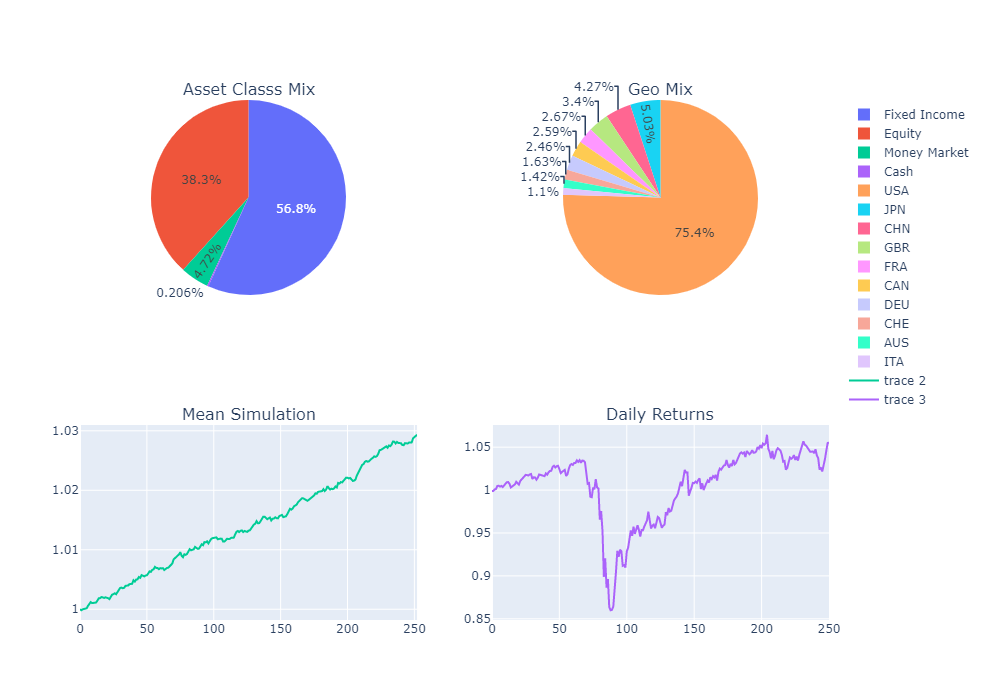

In [82]:
#Vishals work here


#plot 1 asset allocation 
#plot 2 asset allocation by country
#plot 3 simulated mean cumulative return over 1-year
#plot 4 daily returns
#plot 5 1-year cumulative performance


# AOM layout
#aom_ac,  aom_gm_weights, intl_cm_simulated_MEAN_returns_df , daily_returns_etf, df_cum_returns_etf
figaom = make_subplots(rows=2,cols=2,
                      specs=[[{'type':'pie'}, {'type':'pie'}],
                             [{'type':'scatter'}, {'type':'scatter'}]],
                                             #{'type':'chloropeth'}},
                                              subplot_titles=('Asset Classs Mix', 'Geo Mix',
                                                           'Mean Simulation', 'Daily Returns'))
#                                         [{'type':'scatter'}],{}])
    

figaom.add_trace(go.Pie(labels=aom_ac_plotly["Asset Class"],
                        values=aom_ac_plotly["Market Value"]),row=1,col=1)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figaom.add_trace(go.Pie(labels=aom_gm_plotly["Country"],
                        values=aom_gm_plotly["Market Value"]),row=1,col=2)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figaom.add_trace(go.Scatter(y=intl_cm_simulated_MEAN_returns_df["Intl Core Moderate"]),row=2,col=1)
              
figaom.add_trace(go.Scatter(y=df_cum_returns_aom["AOM"]),row=2,col=2)

#fig.add_trace(go.Scatter(y=df_cum_returns_aok["AOM"],mode="lines",
#              row=3, col=1))

figaom.update_layout(height=700, showlegend=True)

# figaom.show()

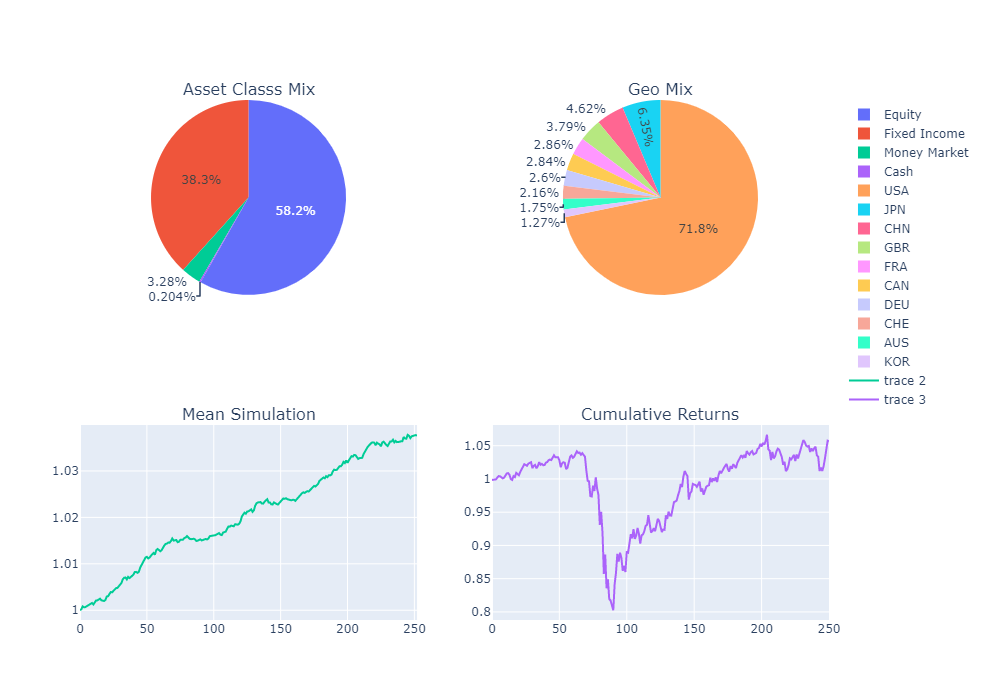

In [83]:
#AOR layout
figaor = make_subplots(rows=2,cols=2,specs=[[{'type':'pie'}, {'type':'pie'}],
                                        [{'type':'scatter'}, {'type':'scatter'}]],
                                        subplot_titles=['Asset Classs Mix', 'Geo Mix',"Mean Simulation", "Cumulative Returns"])
                                       # [{'type':'scatter'}],{}])
    

figaor.add_trace(go.Pie(labels=aor_ac_plotly["Asset Class"],values=aor_ac_plotly["Market Value"]),row=1,col=1)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figaor.add_trace(go.Pie(labels=aor_gm_plotly["Country"],values=aor_gm_plotly["Market Value"]),row=1,col=2)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figaor.add_trace(go.Scatter(y=intl_cg_simulated_MEAN_returns_df["Intl Core Growth"]),row=2,col=1)
              
figaor.add_trace(go.Scatter(y=df_cum_returns_aor["AOR"]),row=2,col=2)

#fig.add_trace(go.Scatter(y=df_cum_returns_aok["AOM"],mode="lines",
#              row=3, col=1))

figaor.update_layout(height=700, showlegend=True)

#figaor.show()

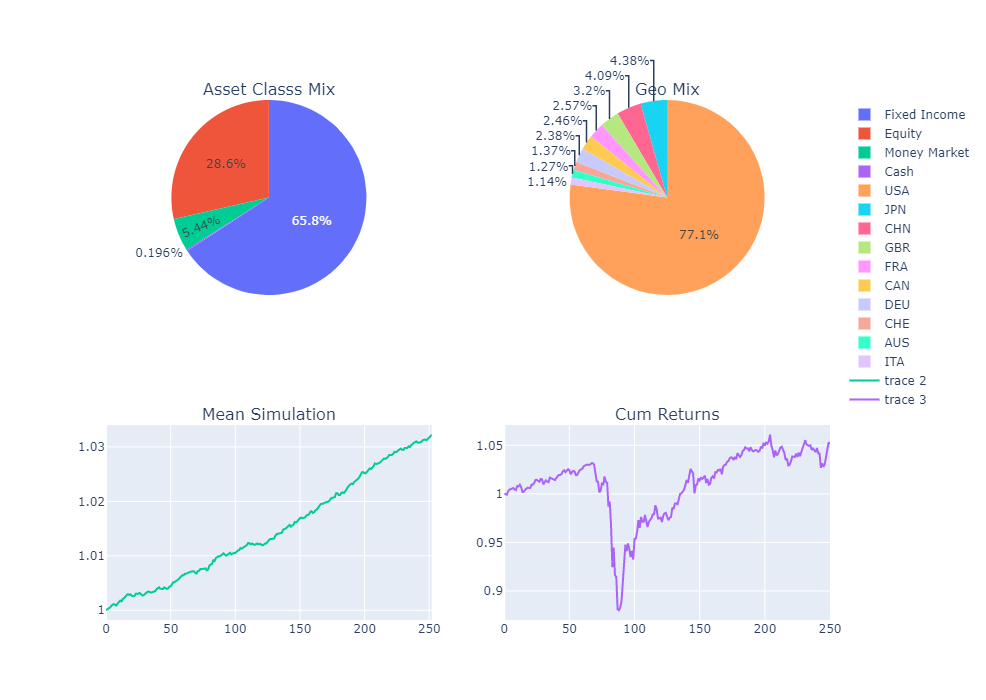

In [84]:
#AOK layout
figaok = make_subplots(rows=2,cols=2,specs=[[{'type':'pie'}, {'type':'pie'}],
                                        [{'type':'scatter'}, {'type':'scatter'}]],
                                        subplot_titles=['Asset Classs Mix', 'Geo Mix',"Mean Simulation", "Cum Returns"])
                                       # [{'type':'scatter'}],{}])
    

figaok.add_trace(go.Pie(labels=aok_ac_plotly["Asset Class"],values=aok_ac_plotly["Market Value"]),row=1,col=1)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figaok.add_trace(go.Pie(labels=aok_gm_plotly["Country"],values=aok_gm_plotly["Market Value"]),row=1,col=2)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figaok.add_trace(go.Scatter(y=intl_cc_simulated_MEAN_returns_df["Intl Core Conservative"]),row=2,col=1)
              
figaok.add_trace(go.Scatter(y=df_cum_returns_aok["AOK"]),row=2,col=2)

#fig.add_trace(go.Scatter(y=df_cum_returns_aok["AOM"],mode="lines",
#              row=3, col=1))

figaok.update_layout(height=700, showlegend=True)

#figaok.show()

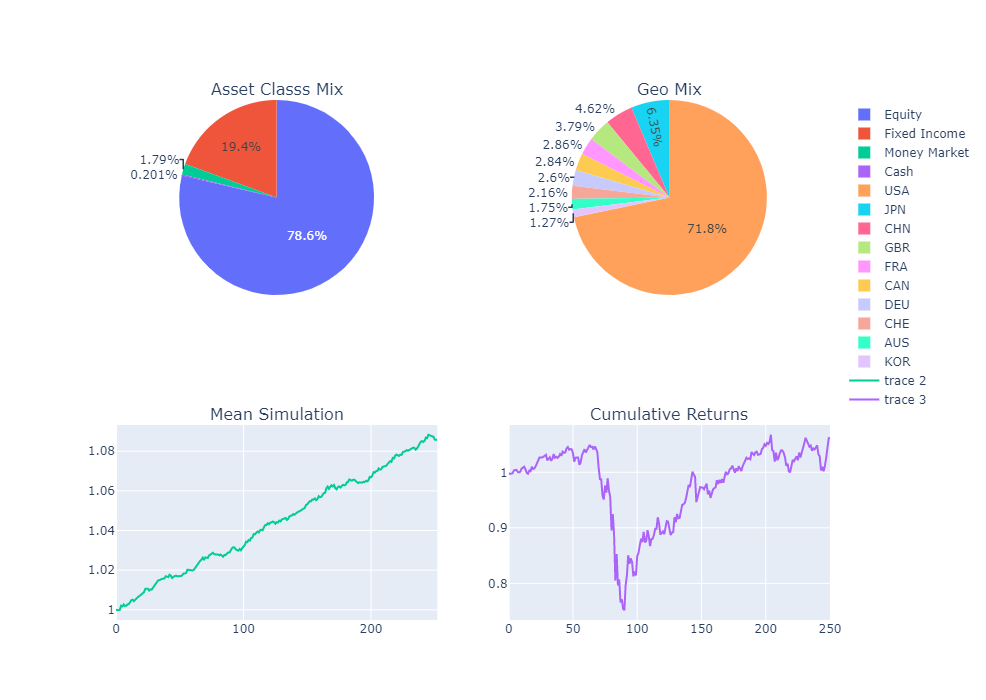

In [85]:
#AOA layout
figaoa = make_subplots(rows=2,cols=2,specs=[[{'type':'pie'}, {'type':'pie'}],
                                        [{'type':'scatter'}, {'type':'scatter'}]],
                                        subplot_titles=['Asset Classs Mix', 'Geo Mix',"Mean Simulation", "Cumulative Returns"])
                                       # [{'type':'scatter'}],{}])
    

figaoa.add_trace(go.Pie(labels=aoa_ac_plotly["Asset Class"],values=aoa_ac_plotly["Market Value"]),row=1,col=1)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figaoa.add_trace(go.Pie(labels=aoa_gm_plotly["Country"],values=aoa_gm_plotly["Market Value"]),row=1,col=2)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figaoa.add_trace(go.Scatter(y=intl_ca_simulated_MEAN_returns_df["Intl Core Aggressive"]),row=2,col=1)
              
figaoa.add_trace(go.Scatter(y=df_cum_returns_aoa["AOA"]),row=2,col=2)

#fig.add_trace(go.Scatter(y=df_cum_returns_aok["AOM"],mode="lines",
#              row=3, col=1))

figaoa.update_layout(height=700, showlegend=True)

#figaoa.show()

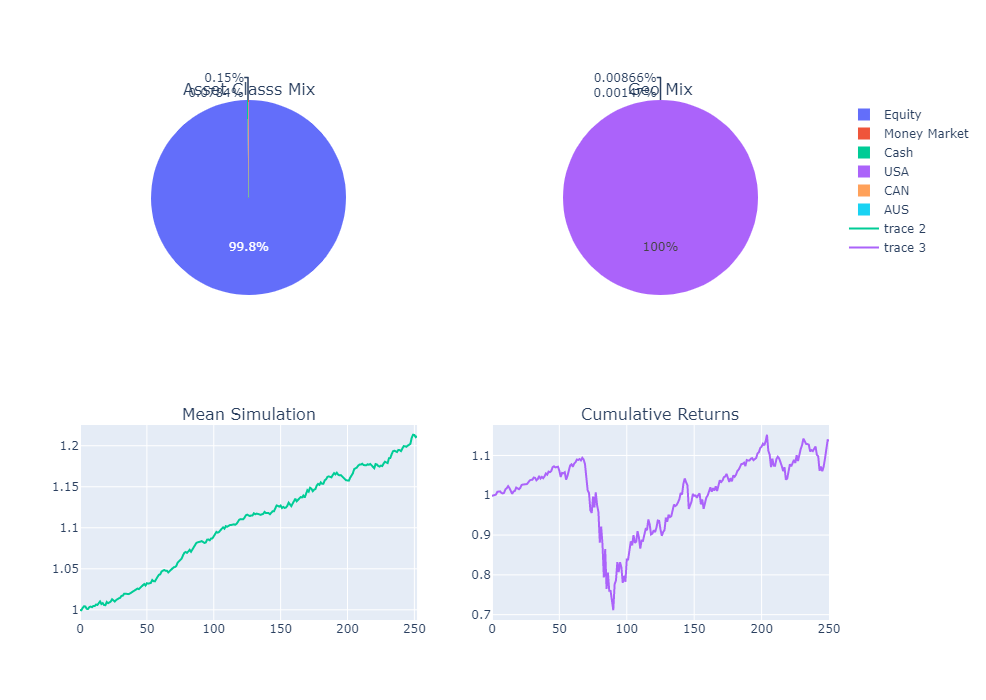

In [86]:
#ITOT Layout
figitot = make_subplots(rows=2,cols=2,specs=[[{'type':'pie'}, {'type':'pie'}],
                                        [{'type':'scatter'}, {'type':'scatter'}]],
                                        subplot_titles=['Asset Classs Mix', 'Geo Mix',"Mean Simulation", "Cumulative Returns"])
                                       # [{'type':'scatter'}],{}])
    

figitot.add_trace(go.Pie(labels=itot_ac_plotly["Asset Class"],values=itot_ac_plotly["Market Value"]),row=1,col=1)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figitot.add_trace(go.Pie(labels=itot_gm_plotly["Country"],values=itot_gm_plotly["Market Value"]),row=1,col=2)
#fig.update_traces(showlegend=True, selector=dict(type='pie'))

figitot.add_trace(go.Scatter(y=intl_cs_simulated_MEAN_returns_df["Intl Core Equity All"]),row=2,col=1)
              
figitot.add_trace(go.Scatter(y=df_cum_returns_itot["ITOT"]),row=2,col=2)

#fig.add_trace(go.Scatter(y=df_cum_returns_aok["AOM"],mode="lines",
#              row=3, col=1))

figitot.update_layout(height=700, showlegend=True)

#figitot.show()


In [87]:
# Read csv data files
aok_hold = pd.read_csv(Path("../input/AOK_holdings.csv"),skiprows=9).dropna().iloc[0:9,0:6].set_index("Ticker")
aom_hold = pd.read_csv(Path("../input/AOM_holdings.csv"),skiprows=9).dropna().iloc[0:9,0:6].set_index("Ticker")
aor_hold = pd.read_csv(Path("../input/AOR_holdings.csv"),skiprows=9).dropna().iloc[0:9,0:6].set_index("Ticker")
aoa_hold = pd.read_csv(Path("../input/AOA_holdings.csv"),skiprows=9).dropna().iloc[0:10,0:6].set_index("Ticker")
itot_hold = pd.read_csv(Path("../input/ITOT_holdings.csv"),skiprows=9).dropna().iloc[0:10,0:6].set_index("Ticker")

In [88]:
# ----------------------------------------------------------------------------------

# PART TWO 
# -------------------------------------------------------------------------------------------------------------------------------------------
# BELOW IS A COPY OF FILE first_app.py WHICH BUILDS STREAMLIT DASHBOARD
# -------------------------------------------------------------------------------------------------------------------------------------------

import streamlit as st
import pandas as pd
import time
import numpy as np
from PIL import Image

st.title('Welcome to T.Bot')
st.write("Please enter your information in the sidebar" )
st.write('________________________________________________________________')
st.write("Your Personal Infomation:")

age = [18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]
investment_term = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
international_diversification = ["Yes", "No"]
retirement_age = 65

name = st.sidebar.text_input('Your Name', '')
st.write('Your name:', name)


age_option = st.sidebar.selectbox(
'Your age:',
age)
'Your age: ', age_option

inv_term_option = st.sidebar.selectbox(
'Your investment horizon (years):',
investment_term)
'Your investment horizon (years): ', inv_term_option

int_div_option = st.sidebar.selectbox(
'Do you want to invest outside the US?',
international_diversification)
'International Divesification?: ', int_div_option

initial_investment = st.sidebar.text_input('Initial Investment (US$)', '10,000')
st.write('Initial investment amount (US$):', initial_investment)

#Determine Risk Tolerance
risk_tolerance = 0
if age_option <60:
    if inv_term_option < 2:
        risk_tolerance = risk_tolerance+1
    elif inv_term_option < 4:
        risk_tolerance = risk_tolerance+2
    elif inv_term_option < 6:    
        risk_tolerance = risk_tolerance+3
    elif inv_term_option < 8:    
        risk_tolerance = risk_tolerance+4
    elif inv_term_option > 7:    
        risk_tolerance = risk_tolerance+5
else: risk_tolerance = risk_tolerance+1

    
st.write('Your investment risk tolerance level:', risk_tolerance)    


#Determine Optimal Investment Portfolio

portfolios = {
    1: {"etf":"AOM", "name": "Core Moderate Allocation"},
    2: {"etf":"AOR", "name": "Core Growth Allocation"},
    3: {"etf":"AOK", "name": "Core Conservative Allocation"},
    4: {"etf":"AOA", "name": "Core Aggressive Allocation"},
    5: {"etf":"ITOT", "name": "Core S&P Total US Stock Market"},
    }

if risk_tolerance == 1:
    st.write('Your optimal investment portfolio:', portfolios[1]["name"])
    st.write('This portfolio invests in iShares AOM ETF and maintains a 40% allocation to Stocks and 60% allocation to Bonds.')
    st.write('WHY AOM?')
    st.write('1. A simple way to build a diversified core portfolio based on moderate risk considerations using one low-cost fund')
    st.write('2. Harness the experience of BlackRock and the efficiency of iShares ETFs to get a broad mix of bonds and global stocks')
    st.write('3. Use to establish a long-term, balanced portfolio and combine with other funds for particular needs like income')
    st.write('________________________________________________________________')

    st.write('INVESTMENT OBJECTIVE')
    st.write('The iShares Core Moderate Allocation ETF seeks to track the investment results of an index composed of a portfolio of underlying equity and fixed income funds intended to represent a moderate target risk allocation strategy.')
    st.write('________________________________________________________________')
    
    
    st.write('PORTFOLIO HOLDINGS:')
    st.dataframe(aom_hold)
    st.write('________________________________________________________________')
    
    st.write('NET EXPENSE RATIO: 0.25%')
    st.write('________________________________________________________________')
       
    st.write('The following chart shows ALL CHARTS OF  AOM portfolio:')
    st.plotly_chart(figaom,use_container_width=True)
    st.plotly_chart(map_aok)
    #st.write('The following chart shows the AOM portfolio current asset allocation:')
    #st.bar_chart(aom_ac)
    #st.write('The following chart shows the AOM portfolio asset allocation by country:')
    #st.bar_chart(aom_gm_weights)
    #st.write('Monte Carlo simulated mean cumulative return over 1-year:')
    #st.line_chart(intl_cm_simulated_MEAN_returns_df)
    st.write('________________________________________________________________')
elif risk_tolerance == 2:    
    st.write('Your optimal investment portfolio:', portfolios[2]["name"])
    st.write('This portfolio invests in iShares AOR ETF and maintains a 60% allocation to Stocks and 40% allocation to Bonds.')
    st.write('________________________________________________________________')
    
    st.write('WHY AOR?')
    st.write('1. A simple way to build a diversified core portfolio focused on growth using one low-cost fund')
    st.write('2. Harness the experience of BlackRock and the efficiency of iShares ETFs to get a broad mix of bonds and global stocks')
    st.write('3. Use to establish a long-term, balanced portfolio and combine with other funds for particular needs like income')
    st.write('________________________________________________________________')

    st.write('INVESTMENT OBJECTIVE')
    st.write('The iShares Core Growth Allocation ETF seeks to track the investment results of an index composed of a portfolio of underlying equity and fixed income funds intended to represent a growth allocation target risk strategy.')
    st.write('________________________________________________________________')
             
    st.write('PORTFOLIO HOLDINGS:')
    st.dataframe(aor_hold)
    
    st.write('NET EXPENSE RATIO: 0.25%')
     
    st.write('The following chart shows ALL CHARTS OF  AOR portfolio:')
    st.plotly_chart(figaor,use_container_width=True)
    st.plotly_chart(map_aor)
    #st.write('The following chart shows the AOR portfolio current asset allocation:')
    #st.bar_chart(aor_ac)
    #st.write('The following chart shows the AOR portfolio asset allocation by country:')
    #st.bar_chart(aor_gm_weights)
    #st.write('Monte Carlo simulated mean cumulative return over 1-year:')
    #st.line_chart(intl_cg_simulated_MEAN_returns_df)
    st.write('________________________________________________________________')
elif risk_tolerance == 3:    
    st.write('Your optimal investment portfolio:', portfolios[3]["name"])
    st.write('This portfolio invests in iShares AOK ETF and maintains a 70% allocation to Stocks and 30% allocation to Bonds.')
    st.write('________________________________________________________________')
    
    st.write('WHY AOK?')
    st.write('1. A simple way to build a diversified core portfolio based on conservative risk considerations using one low-cost fund')
    st.write('2. Harness the experience of BlackRock and the efficiency of iShares ETFs to get a broad mix of bonds and global stocks')
    st.write('3. Use to establish a long-term, balanced portfolio and combine with other funds for particular needs like income')
    st.write('________________________________________________________________')
    
    
    st.write('INVESTMENT OBJECTIVE')
    st.write('The iShares Core Conservative Allocation ETF seeks to track the investment results of an index composed of a portfolio of underlying equity and fixed income funds intended to represent a conservative target risk allocation strategy.')
    st.write('________________________________________________________________')
             
    st.write('PORTFOLIO HOLDINGS:')
    st.dataframe(aok_hold)         
    
    st.write('NET EXPENSE RATIO: 0.25%')
             

    st.write('The following chart shows ALL CHARTS OF AOK portfolio:')
    st.plotly_chart(figaok,use_container_width=True)
    st.plotly_chart(map_aok)
    #st.write('The following chart shows the AOK portfolio current asset allocation:')
    #st.bar_chart(aok_ac)
    #st.write('The following chart shows the AOR portfolio asset allocation by country:')
    #st.bar_chart(aok_gm_weights)
    #st.write('Monte Carlo simulated mean cumulative return over 1-year:')
    #st.line_chart(intl_cc_simulated_MEAN_returns_df)
    st.write('________________________________________________________________')
elif risk_tolerance == 4:    
    st.write('Your optimal investment portfolio:', portfolios[4]["name"])
    st.write('This portfolio invests in iShares AOA ETF and maintains a 80% allocation to Stocks and 20% allocation to Bonds.')
    st.write('________________________________________________________________')
    
    st.write('WHY AOA?')
    st.write('1. A simple way to build a diversified core portfolio based on more aggressive risk considerations using one low-cost fund')
    st.write('2. Harness the experience of BlackRock and the efficiency of iShares ETFs to get a broad mix of bonds and global stocks')
    st.write('3. Use to establish a long-term, balanced portfolio and combine with other funds for particular needs like income')
    st.write('________________________________________________________________')
             
        
    st.write('INVESTMENT OBJECTIVE')
    st.write('The iShares Core Aggressive Allocation ETF seeks to track the investment results of an index composed of a portfolio of underlying equity and fixed income funds intended to represent an aggressive target risk allocation strategy.')
    st.write('________________________________________________________________')
    
    st.write('PORTFOLIO HOLDINGS:')
    st.dataframe(aoa_hold)
    
    st.write('NET EXPENSE RATIO: 0.25%')
             

    st.write('The following chart shows ALL CHARTS OF  AOA portfolio:')
    st.plotly_chart(figaoa,use_container_width=True)
    st.plotly_chart(map_aoa)
    #st.write('The following chart shows the AOA portfolio current asset allocation:')
    #st.bar_chart(aoa_ac)
    #st.write('The following chart shows the AOR portfolio asset allocation by country:')
    #st.bar_chart(aoa_gm_weights)
    #st.write('Monte Carlo simulated mean cumulative return over 1-year:')
    #st.line_chart(intl_ca_simulated_MEAN_returns_df)
    st.write('________________________________________________________________')
else: 
    st.write('Your optimal investment portfolio:', portfolios[5]["name"])  
    st.write('This portfolio invests in iShares ITOT ETF and maintains a 100% allocation to US Stocks.')
    st.write('WHY ITOT?')
    st.write('1. Low-cost and convenient access to the total U.S. stock market in a single fund. ')
    st.write('2. Exposure to the total U.S. stock market, ranging from some of the smallest to largest companies')
    st.write('3. Use at the core of your portfolio to seek long-term growth')
    st.write('________________________________________________________________')
    
    st.write('INVESTMENT OBJECTIVE')
    st.write('The iShares Core S&P Total U.S. Stock Market ETF seeks to track the investment results of a broad-based index composed of U.S. equities.')
    st.write('________________________________________________________________')
             
    st.write('PORTFOLIO TOP 10 HOLDINGS:')
    st.dataframe(itot_hold)        
    

    st.write('NET EXPENSE RATIO: 0.03%')
             

    st.write('The following chart shows ALL CHARTS OF  ITOT portfolio:')
    st.plotly_chart(figitot,use_container_width=True)
    st.plotly_chart(map_itot)
    #st.write('The following chart shows the ITOT portfolio current asset allocation:')
    #st.bar_chart(itot_ac)
    #st.write('The following chart shows ITOT portfolio asset allocation by country:')
    #st.bar_chart(itot_gm_weights)
    #st.write('Monte Carlo simulated mean cumulative return over 1-year:')
    #st.line_chart(intl_cs_simulated_MEAN_returns_df)
    st.write('________________________________________________________________')
